In [1]:
# Load the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Load the dataset
wine_data = pd.read_csv("winequality-red.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [4]:
# Data preprocessing including visualization

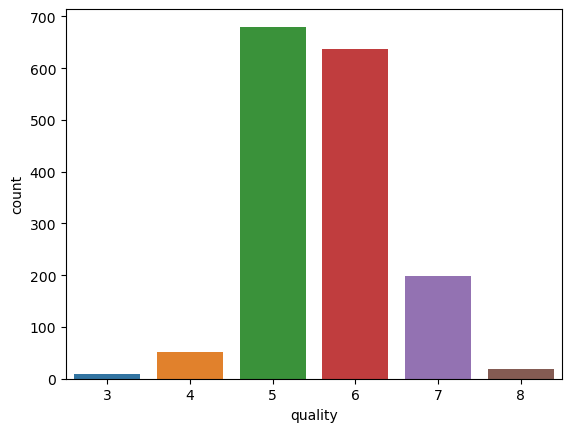

In [5]:
# Load the dataset
wine_data = pd.read_csv("winequality-red.csv")

# Check for missing values
wine_data.isnull().sum()

# Summary statistics
wine_data.describe()

# Visualization 
sns.countplot(x='quality', data=wine_data)
plt.show()

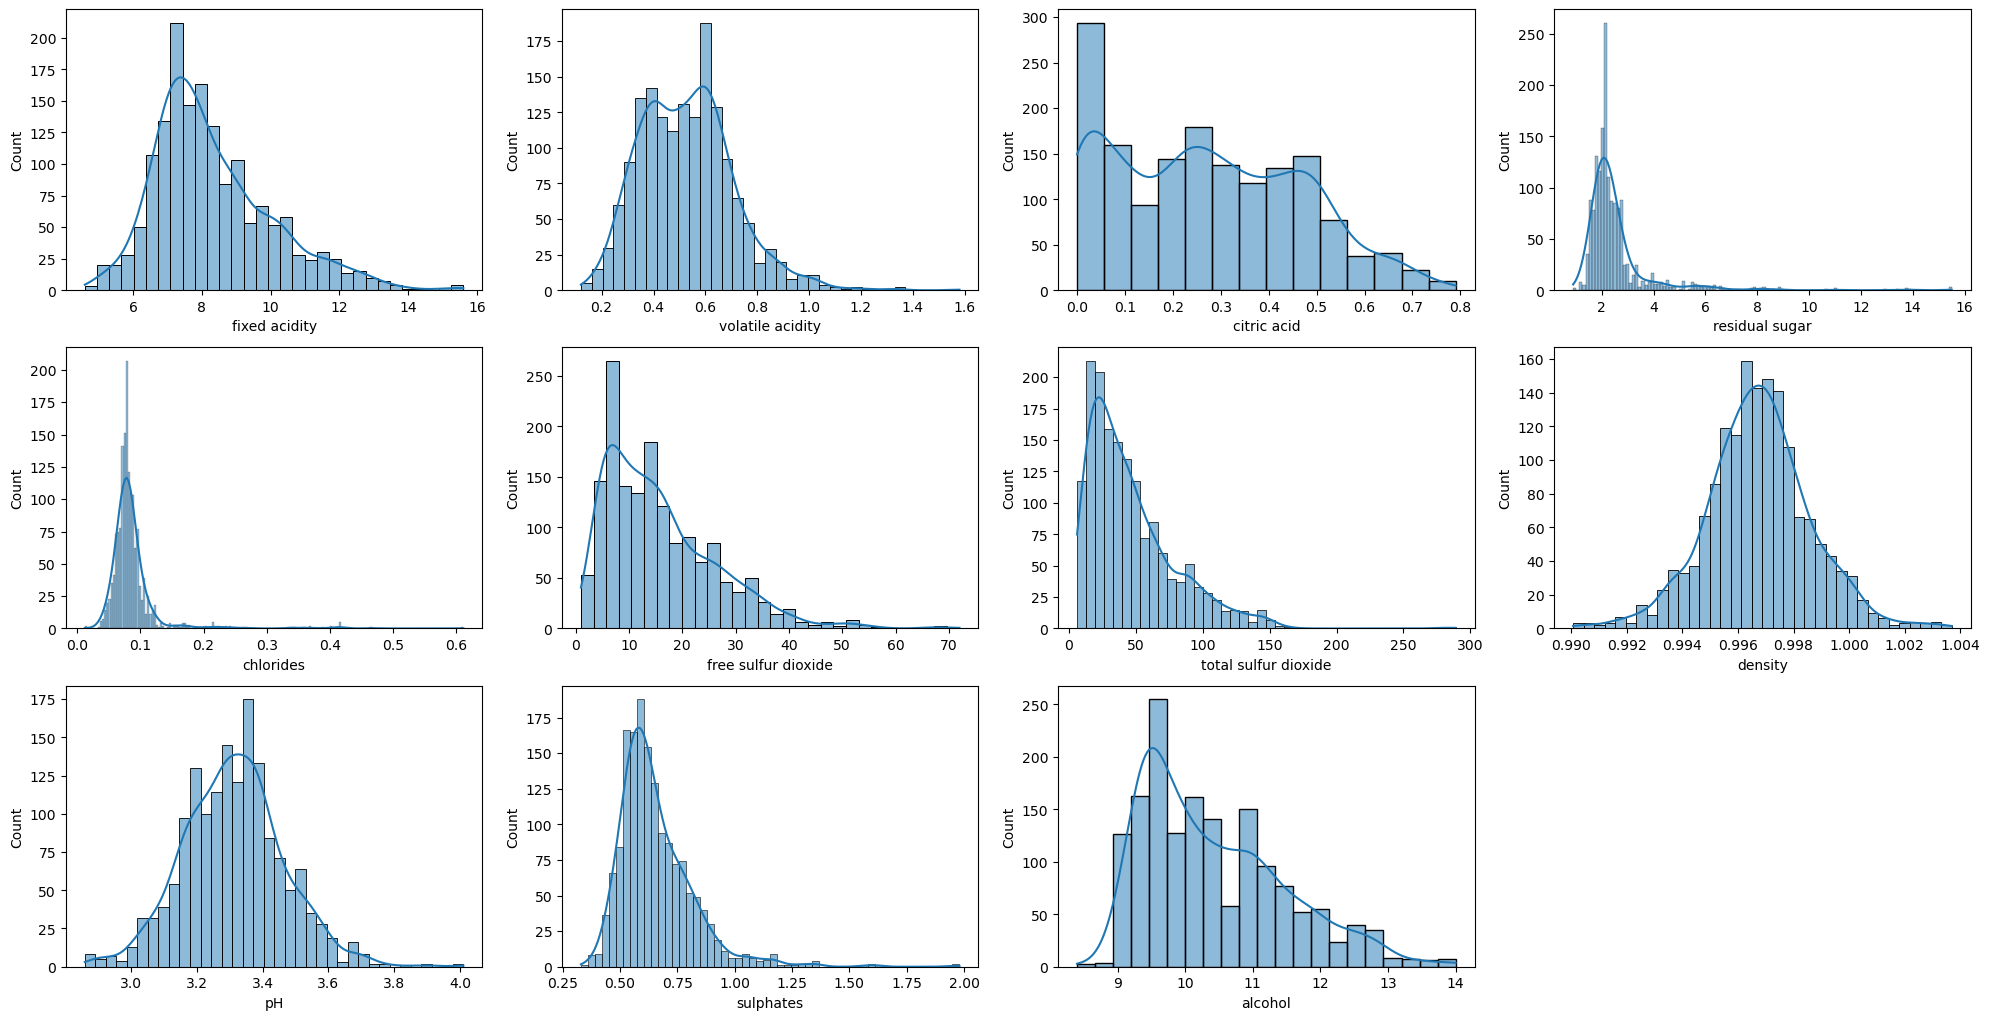

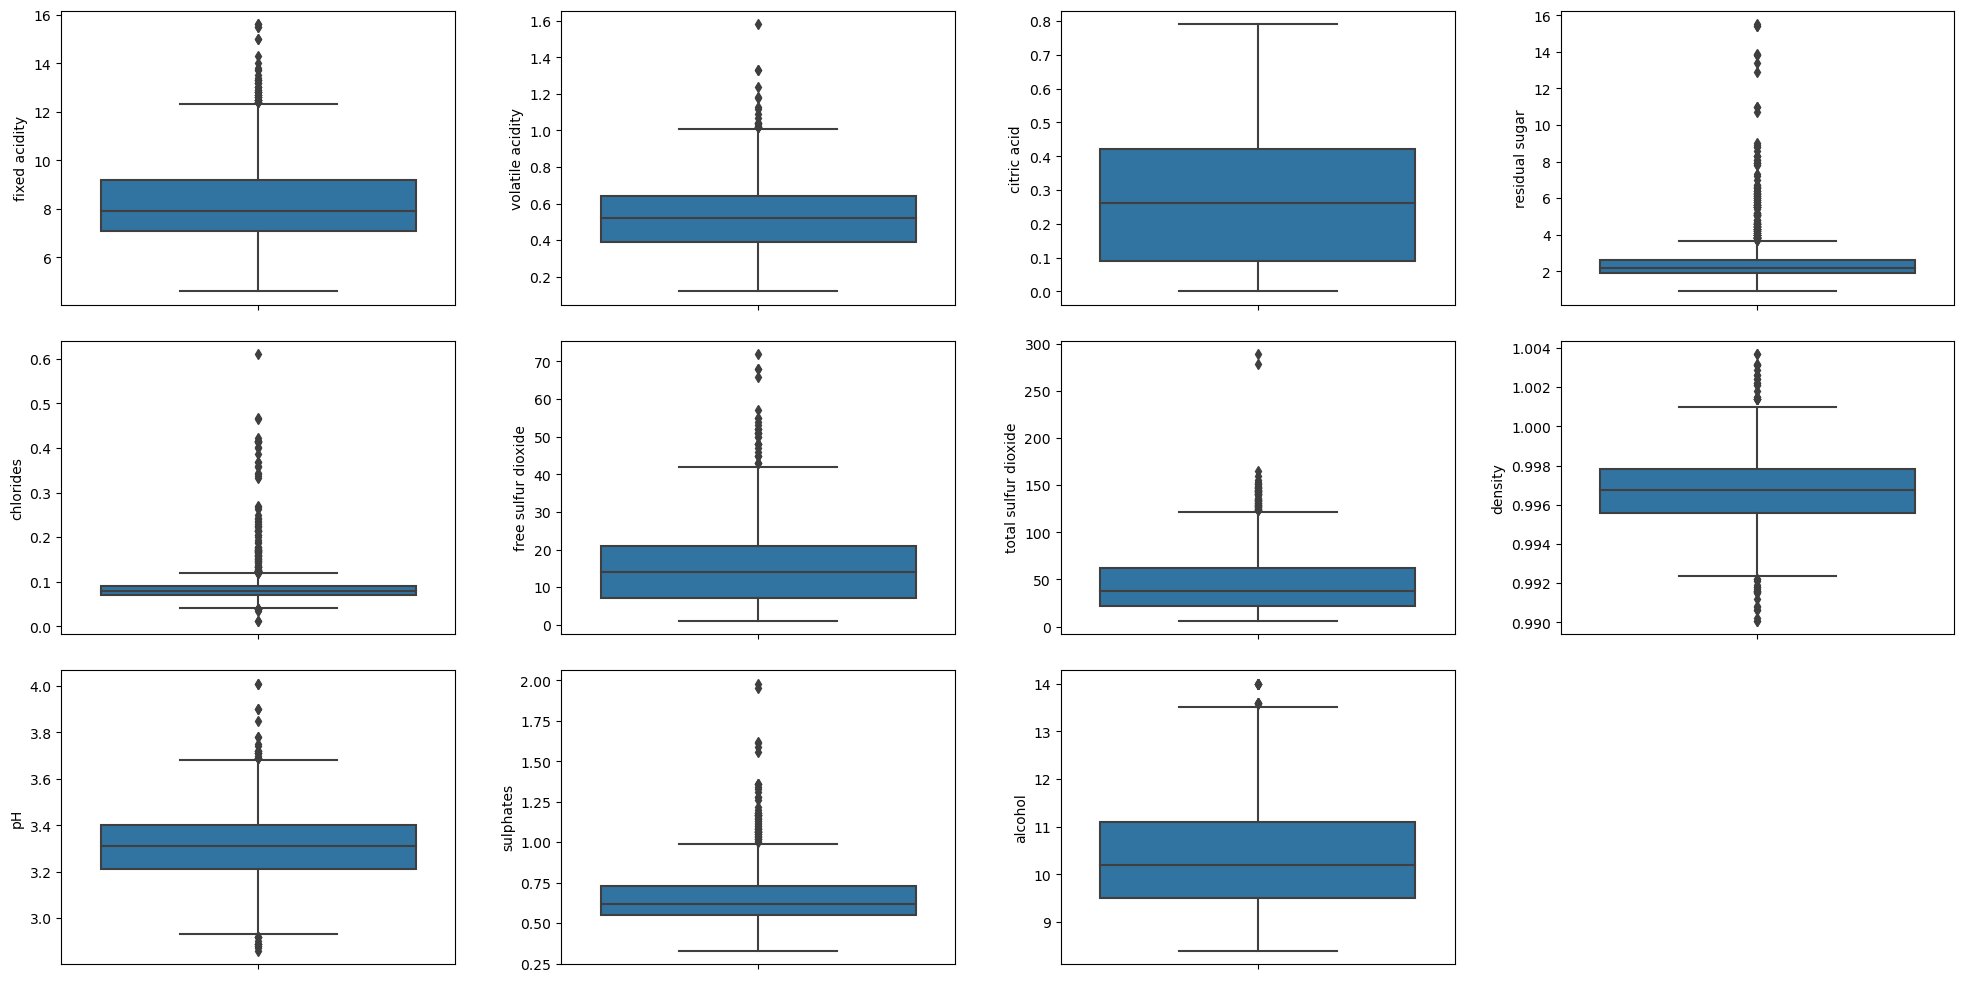

In [6]:
fig = plt.figure(figsize=(20,20))
for index, column in enumerate(list(wine_data.columns)):
    if column!="quality":
        plt.subplot(6,4,index+1)
        sns.histplot(wine_data[column], kde=True)
fig.tight_layout(pad=1)
fig = plt.figure(figsize=(20,20))
for index, column in enumerate(list(wine_data.columns)):
    if column!="quality":
        plt.subplot(6,4,index+1)
        sns.boxplot(y=column, data=wine_data)
fig.tight_layout(pad=2)

In [7]:
# Multivariant

[]

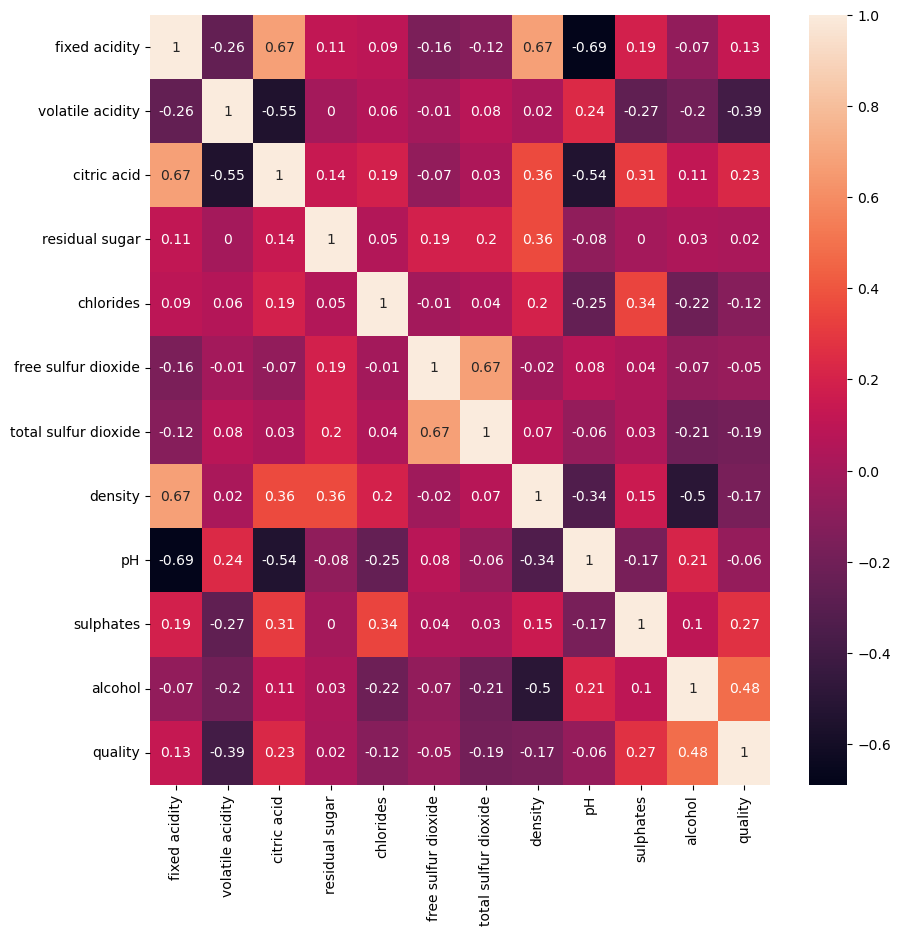

In [8]:
fig = plt.figure(figsize=(10,10))
ax=sns.heatmap(wine_data.corr().round(2), annot=True)
ax.plot()

In [9]:
# Detect and remove outliers using the IQR method
Q1 = wine_data.quantile(0.25)
Q3 = wine_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

wine_data_cleaned = wine_data[(wine_data >= lower_bound) & (wine_data <= upper_bound)].dropna()

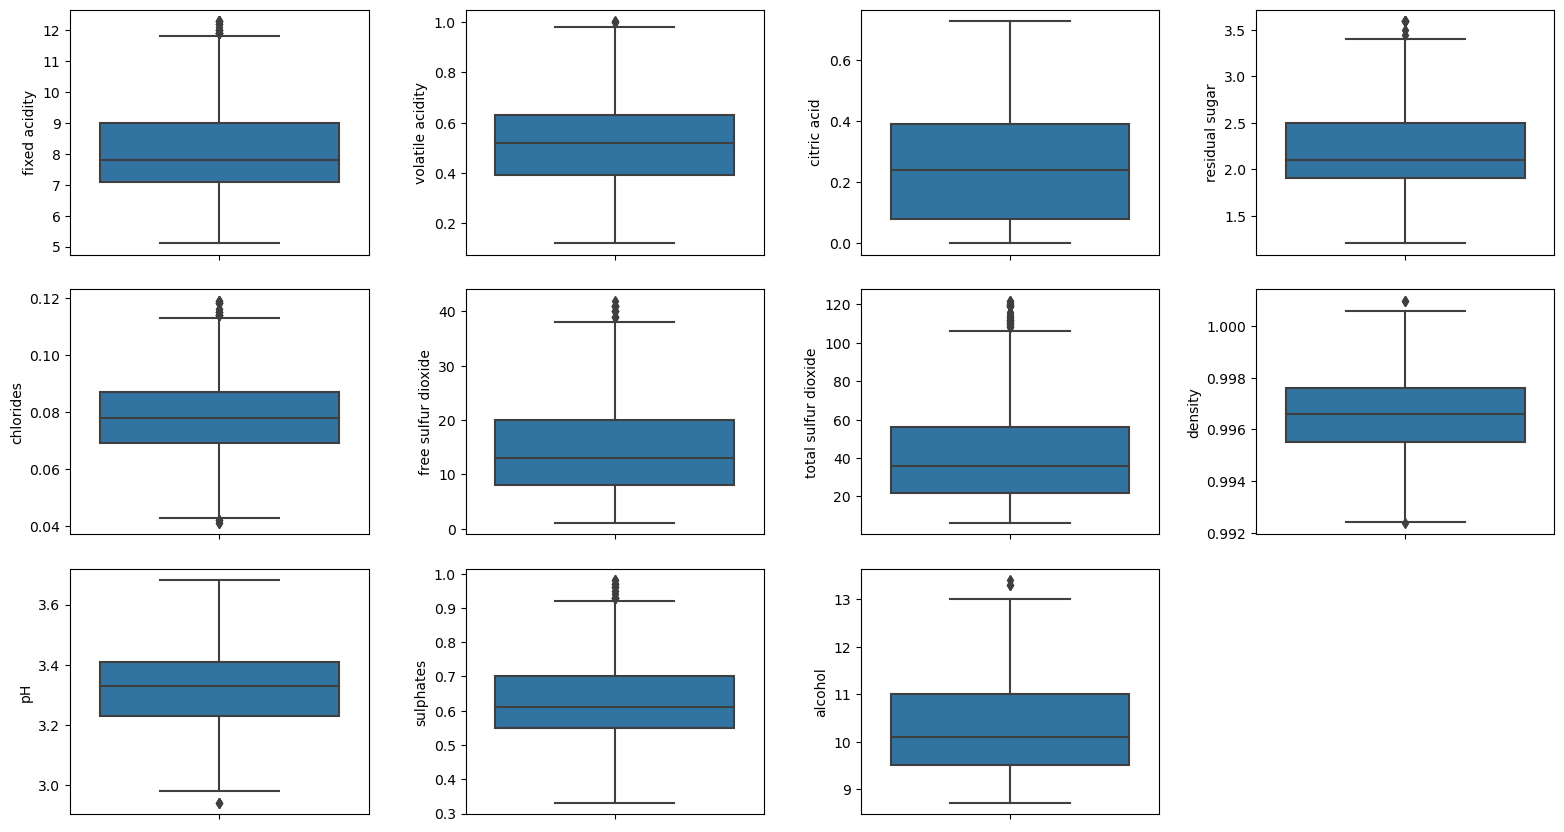

In [10]:
fig = plt.figure(figsize=(16,17))
for index, column in enumerate(list(wine_data_cleaned.columns)):
    if column!="quality":
        plt.subplot(6,4,index+1)
        sns.boxplot(y=column, data=wine_data_cleaned)
fig.tight_layout(pad=2)


In [11]:
# Machine Learning Model building

In [12]:
# Split the data into train and test sets
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a Random Forest Classifier 
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.6875
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        14
           5       0.74      0.78      0.76       143
           6       0.62      0.74      0.67       119
           7       0.78      0.54      0.64        39
           8       1.00      0.00      0.00         4

    accuracy                           0.69       320
   macro avg       0.86      0.34      0.34       320
weighted avg       0.71      0.69      0.67       320



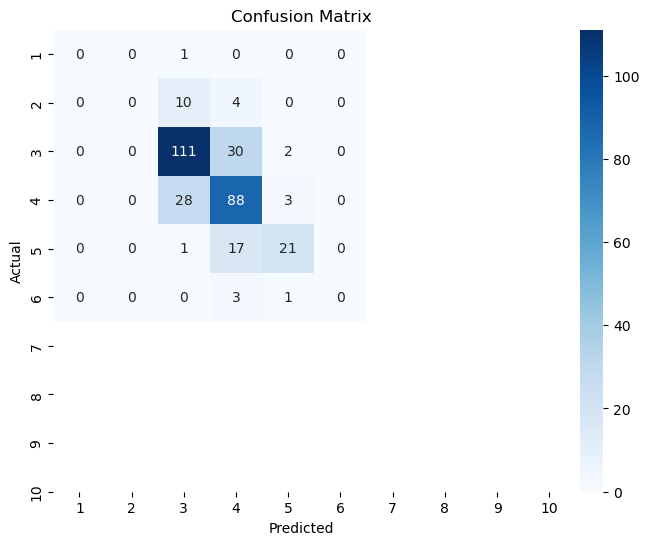

In [15]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=range(1, 11), yticklabels=range(1, 11))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Test with random observation

In [17]:
# Test with random observations 
random_observation = [[7.0, 0.5, 0.3, 2.0, 0.08, 10.0, 40.0, 0.997, 3.2, 0.6, 10.0]]
prediction = model.predict(random_observation)
print(f"Predicted Wine Quality: {prediction[0]}")

Predicted Wine Quality: 5


C:\Users\nagavardhan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
